# Analyze 240 timepoints for phase 1~3, 0 conc

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, random, re, subprocess, time

from matplotlib.pyplot import figure

from platform import python_version

print(python_version())

from scipy import stats

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

3.7.8


In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/Dropbox/script/python/srpAnalytics/code/latest/2_bmd/1_before_bmd/LPR/analyze_240_timepoints_LPR/0_conc


In [3]:
# mac       - phase I, II, III - LPR - after_merging - 240 timepoints in min
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II_III/LPR/input/phase_I_II_III_LPR_240_timepoints_morpho_filtered_min.csv'
# 383 unique chemicals, 923 unique plates

df_lpr_min = pd.read_csv(complete_file_path, header = 0)
df_lpr_min.head()
#df_LPR.shape # (72826, 29)


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,...,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
0,1030,50.0,9414,A01,0.0,0.0,0.0,84.5,121.3,119.1,...,0.0,17.3,26.1,53.8,50.4,8.6,0.0,1.8,37.1,0.0
1,1030,35.6,9414,A02,1.2,3.0,0.0,162.1,158.4,181.6,...,5.3,37.1,121.3,153.6,203.2,24.1,2.1,0.0,38.5,112.3
2,1030,11.2,9414,A03,0.0,0.0,0.0,42.8,82.6,63.8,...,43.9,0.0,12.3,67.7,84.2,22.2,0.0,15.2,60.4,54.1
3,1030,5.0,9414,A04,2.7,1.8,6.3,17.4,41.7,9.4,...,0.0,22.2,11.7,43.3,153.7,16.6,0.0,0.0,21.8,0.0
4,1030,1.0,9414,A05,3.0,1.3,4.5,168.8,214.3,154.0,...,10.3,40.0,26.9,153.1,112.4,38.9,1.0,4.7,67.4,134.6


In [4]:
df_0_conc       = df_lpr_min.loc[df_lpr_min['conc'] == 0]
df_0_conc.head()
len(np.unique(df_0_conc['chemical.id']))

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,...,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
5,1030,0.0,9414,A06,1.2,13.7,6.3,80.9,123.4,85.9,...,3.6,23.2,84.3,123.1,55.2,27.9,0.0,0.0,10.6,47.5
10,1030,0.0,9414,A12,12.2,4.9,8.6,57.4,46.4,7.9,...,0.0,22.3,21.7,27.0,0.7,1.0,0.0,0.0,53.2,0.0
16,1030,0.0,9414,B06,3.2,0.0,0.0,80.5,96.8,140.6,...,10.8,21.2,144.4,78.7,33.4,0.0,0.0,0.0,53.2,98.4
22,1030,0.0,9414,B12,0.0,0.0,0.0,26.7,44.4,30.1,...,0.0,26.2,8.4,36.8,23.7,9.5,5.5,21.0,0.0,0.0
28,1030,0.0,9414,C06,12.4,34.5,96.5,136.5,148.6,36.8,...,0.0,7.0,25.3,9.6,0.9,15.8,0.4,11.2,8.3,1.7


df_0_conc.shape:(12171, 28)
/Users/kimd999/Dropbox/script/python/srpAnalytics/code/latest/2_bmd/1_before_bmd/analyze_240_timepoints_LPR/0_conc
image file is saved


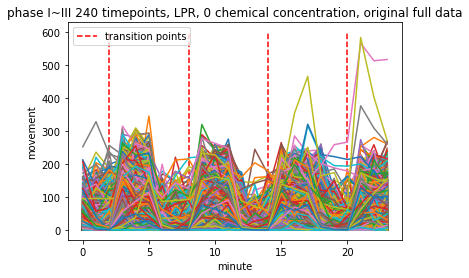

'Sanity check' took 39.6 seconds


In [12]:
start_time = time.time()

# Plot few lpr curves to check transition points
# all concentrations
time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

print ("df_0_conc.shape:" + str(df_0_conc.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (df_lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_0_conc.iloc[:100,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(df_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));

# save image file
cwd = os.getcwd()
print (cwd)

#array_tran = 2,8
#plt.axvline(array_tran, color='r', label='transition points', linewidth=2)

plt.vlines(x = [2, 8, 14, 20], ymin = 0,  ymax=600,
           colors = 'red', 
           label = 'transition points', linestyles='--')
plt.legend(loc="best")
plt.xlabel('minute')
plt.ylabel('movement')
plt.title('phase I~III 240 timepoints, LPR, 0 chemical concentration, original full data')
#plt.title('phase I~III 240 timepoints, LPR, 0 concentration, original first 100 data')


plt.savefig("all_phase_LPR_240_timepoints_all_conc.png", bbox_inches="tight")
# this should be ran within same box to be effective
print ("image file is saved")

plt.show()

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("'Sanity check' took "+str(time_took))

### see near 0 rows

In [6]:
df_0_conc.head()

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,...,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
5,1030,0.0,9414,A06,1.2,13.7,6.3,80.9,123.4,85.9,...,3.6,23.2,84.3,123.1,55.2,27.9,0.0,0.0,10.6,47.5
10,1030,0.0,9414,A12,12.2,4.9,8.6,57.4,46.4,7.9,...,0.0,22.3,21.7,27.0,0.7,1.0,0.0,0.0,53.2,0.0
16,1030,0.0,9414,B06,3.2,0.0,0.0,80.5,96.8,140.6,...,10.8,21.2,144.4,78.7,33.4,0.0,0.0,0.0,53.2,98.4
22,1030,0.0,9414,B12,0.0,0.0,0.0,26.7,44.4,30.1,...,0.0,26.2,8.4,36.8,23.7,9.5,5.5,21.0,0.0,0.0
28,1030,0.0,9414,C06,12.4,34.5,96.5,136.5,148.6,36.8,...,0.0,7.0,25.3,9.6,0.9,15.8,0.4,11.2,8.3,1.7


7.373495098025365


array([10.72711725,  7.02078498,  7.82277915, 41.51764925, 47.25060456,
       44.13449676,  9.36402243,  4.13375253,  5.19577644, 43.71039192,
       43.01525117, 41.64141796, 11.15444376,  3.56255994,  4.82894807,
       36.63295776, 39.0554252 , 39.64688333, 15.00224238,  5.44680026,
        4.22271399, 32.38722792, 37.81340662, 38.8387158 ])

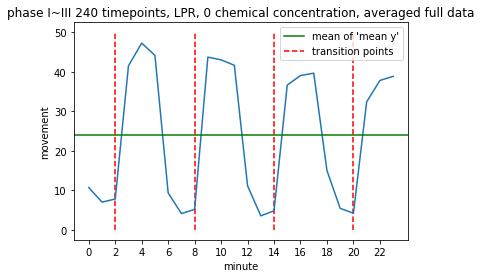

In [91]:
# (goal): see average y values
df_lpr_min_t_only = pd.DataFrame(df_0_conc.iloc[:,4:28]).astype(float)
#print(df_lpr_min_t_only.describe())

mean_of_light = []
for i in ['t0', 't1', 't2', 't6', 't7', 't8', 't12', 't13', 't14', 't18', 't19', 't20']:
    mean_of_light.append(df_lpr_min_t_only[i].mean())

print (np.mean(mean_of_light))


array_mean = df_lpr_min_t_only.mean(axis=0).to_numpy()

display(array_mean)
x = []
for i in range(24):
    x.append(i)

plt.plot(x, array_mean)

x_labels = []
for i in range(24):
    x_labels.append(i)

plt.xticks(np.arange(min(x), max(x)+1, 2))

plt.xlabel("minute")
plt.ylabel("movement")
plt.title('phase I~III 240 timepoints, LPR, 0 chemical concentration, averaged full data')
plt.axhline(label='mean of \'mean y\'', y=array_mean.mean(), xmin=min(x), xmax=max(x), color='g')

plt.vlines(x = [2, 8, 14, 20], ymin = 0,  ymax=50,
           colors = 'red', 
           label = 'transition points', linestyles='--')
plt.legend()

l = plt.legend(loc ="best")
l.set_zorder(2.5)

plt.show()

In [57]:
def count_near_0_per_plate_counting_by_row(array_lpr_min_t_only):
    mostly_lt_5 = 0
    not_mostly_lt_5 = 0
    for i in range(len(array_lpr_min_t_only)):
        array_lpr_min_t_only_per_row = array_lpr_min_t_only[i]
        #print (array_lpr_min_t_only_per_row)
        count_lt_5 = 0
        count_gt_5 = 0
        for j in range(len(array_lpr_min_t_only_per_row)):
            if (array_lpr_min_t_only_per_row[j] < 5):
                count_lt_5 += 1
            else:
                count_gt_5 += 1

        if count_lt_5 > (count_lt_5+count_gt_5)*0.75:
            mostly_lt_5 += 1
        else:
            not_mostly_lt_5 += 1
    #print (f"mostly_lt_5: {mostly_lt_5}")
    #print (f'not_mostly_lt_5: {not_mostly_lt_5}')
    
    df_per_count = pd.DataFrame({'count': [mostly_lt_5, not_mostly_lt_5]},
                  index=['(>75%) y < 5', '(>75%) y >= 5'])

    i = [0]
    def absolute_value(val):
        a  = df_per_count.iloc[i[0]%len(df_per_count),i[0]//len(df_per_count)]
        i[0] += 1
        return a

    '''
    # keep this for drawing fig
    my_explode=(0,0.1)
    plot = df_per_count.plot.pie(title="fish counts", y='count', figsize=(5, 5),
                       explode=my_explode, autopct='%1.1f%%')
    #plot = df_per_count.plot.pie(title="fish counts", y='count', figsize=(5, 5),
#                        explode=my_explode, autopct=absolute_value)

    try:
        largest_file_index = 0
        files = [f for f in os.listdir('.') if os.path.isfile(f)]
        for f_name in files:
            if 'pie' in f_name:
                #print (f_name)
                splited_f_name = f_name.split('.png')
                splited_f_name2 = splited_f_name[0].split('pie-')
                if (int(splited_f_name2[1])) > largest_file_index:
                    largest_file_index = (int(splited_f_name2[1]))
                    
        output_f_name = 'pie-' + str(largest_file_index+1) + '.png'
        plot.figure.savefig(output_f_name)
                
    except:
        plot.figure.savefig('pie-001.png')
    '''     
    if (mostly_lt_5 > (mostly_lt_5 + not_mostly_lt_5) * 0.75):
        return "mostly_lt_5"
    else:
        return "not_mostly_lt_5"

In [103]:
def count_near_0_per_plate_counting_each_fish(array_lpr_min_t_only):
    threshold = 7.4
    array_lpr_min_t_only_flattened = array_lpr_min_t_only.flatten()
    count_lt_5 = 0
    count_gt_5 = 0
    for i in range(len(array_lpr_min_t_only_flattened)):
        if (array_lpr_min_t_only_flattened[i] < threshold):
            count_lt_5 += 1
        else:
            count_gt_5 += 1


    df_per_count = pd.DataFrame({'count': [count_lt_5, count_gt_5]},
                  index=['(>75%) y < 5', '(>75%) y >= 5'])

    i = [0]
    def absolute_value(val):
        a  = df_per_count.iloc[i[0]%len(df_per_count),i[0]//len(df_per_count)]
        i[0] += 1
        return a
            
    '''
    # keep this for drawing fig
    my_explode=(0,0.1)
    plot = df_per_count.plot.pie(title="fish counts", y='count', figsize=(5, 5),
                       explode=my_explode, autopct='%1.1f%%')
    #plot = df_per_count.plot.pie(title="fish counts", y='count', figsize=(5, 5),
#                        explode=my_explode, autopct=absolute_value)

    try:
        largest_file_index = 0
        files = [f for f in os.listdir('.') if os.path.isfile(f)]
        for f_name in files:
            if 'pie' in f_name:
                #print (f_name)
                splited_f_name = f_name.split('.png')
                splited_f_name2 = splited_f_name[0].split('pie-')
                if (int(splited_f_name2[1])) > largest_file_index:
                    largest_file_index = (int(splited_f_name2[1]))
                    
        output_f_name = 'pie-' + str(largest_file_index+1) + '.png'
        plot.figure.savefig(output_f_name)
                
    except:
        plot.figure.savefig('pie-001.png')
    '''     
    
            
    if count_lt_5 > (count_lt_5+count_gt_5)*0.75:
        '''
        array_t = []
        for i in range(24):
            array_t.append(i)
        #print(array_t)

        # just to draw plot per row
        count = 0
        for i in range(len(array_lpr_min_t_only)):
            array_lpr_min_t_only_per_row = array_lpr_min_t_only[i]
            plt.plot(array_t, array_lpr_min_t_only_per_row, color='cyan', linestyle='-')

            plt.xlabel("minute")
            plt.ylabel("movement")
            plt.title("(mostly < threshold) Individual movement of fish per minute (data->0 concentration)")

            plt.vlines(x = [2, 8, 14, 20], ymin = 0,  ymax=150,
                   colors = 'red', 
                   label = 'transition points', linestyles='--')
            plt.legend()

            plt.show()
            count += 1
            if count > 10:
                break
        '''
        return "mostly_lt_5"

    else:
        '''
        array_t = []
        for i in range(24):
            array_t.append(i)
        #print(array_t)

        # just to draw plot per row
        count = 0
        for i in range(len(array_lpr_min_t_only)):
            array_lpr_min_t_only_per_row = array_lpr_min_t_only[i]
            plt.plot(array_t, array_lpr_min_t_only_per_row, color='cyan', linestyle='-')

            plt.xlabel("minute")
            plt.ylabel("movement")
            plt.title("(NOT mostly < threshold) Individual movement of fish per minute (data->0 concentration)")

            plt.vlines(x = [2, 8, 14, 20], ymin = 0,  ymax=150,
                   colors = 'red', 
                   label = 'transition points', linestyles='--')
            plt.legend()

            plt.show()
            count += 1
            if count > 10:
                break
        '''
        return "not_mostly_lt_5"

,Condition,Count
0,number_of_plates NOT 'mostly < threshold',844
1,number_of_plates 'mostly < threshold',79


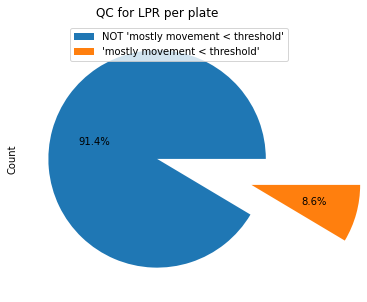

In [113]:
## see near 0 fish per chemical and plate

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_0_conc['chemical.id'])
else:
    chemical_id_from_here = [53, 1595]
    #chemical_id_from_here = [53]

dic_per_chemical_plate = {}

for chemical_id in chemical_id_from_here:
    #print("\nchemical_id:\n" + str(chemical_id))
    
    df_lpr_min_per_chemical_id = df_0_conc.loc[df_0_conc['chemical.id'] == chemical_id]
    
    plate_id_from_here = np.unique(df_lpr_min_per_chemical_id['plate.id'])
    for plate_id in plate_id_from_here:
        #print("\nplate_id:\n" + str(plate_id))
        df_lpr_min_per_chemical_id_plate_id = df_lpr_min_per_chemical_id.loc[df_lpr_min_per_chemical_id['plate.id'] == plate_id]
        df_lpr_min_per_chemical_id_plate_id_t_only = pd.DataFrame(df_lpr_min_per_chemical_id_plate_id.iloc[:,4:28])
        #print(pd.DataFrame(df_lpr_min_per_chemical_id_plate_id.iloc[:,0:5]))
        
        array_lpr_min_per_chemical_id_plate_id_t_only = df_lpr_min_per_chemical_id_plate_id_t_only.to_numpy()
        #print(f"array_lpr_min_per_chemical_id_plate_id_t_only: {array_lpr_min_per_chemical_id_plate_id_t_only}")
        #print(f"len(array_lpr_min_per_chemical_id_plate_id_t_only): {len(array_lpr_min_per_chemical_id_plate_id_t_only)}")
        #print(f"len(array_lpr_min_per_chemical_id_plate_id_t_only[0]): {len(array_lpr_min_per_chemical_id_plate_id_t_only[0])}")
        
        #verdict = count_near_0_per_plate_counting_by_row(array_lpr_min_per_chemical_id_plate_id_t_only)
        verdict = count_near_0_per_plate_counting_each_fish(array_lpr_min_per_chemical_id_plate_id_t_only)
        
        #print(f"chemical_id: {chemical_id}, plate_id: {plate_id} -> {verdict}")
        
        combi = (str(chemical_id), str(plate_id))
        dic_per_chemical_plate[combi] = verdict

number_of_chemical_plate_not_mostly_lt_5 = sum(map(('not_mostly_lt_5').__eq__, dic_per_chemical_plate.values()))
number_of_chemical_plate_mostly_lt_5 = sum(map(('mostly_lt_5').__eq__, dic_per_chemical_plate.values()))

data = [['number_of_plates NOT \'mostly < threshold\'', number_of_chemical_plate_not_mostly_lt_5], 
        ['number_of_plates \'mostly < threshold\'', number_of_chemical_plate_mostly_lt_5]]

df_result = pd.DataFrame(data, columns = ['Condition', 'Count'], index=None)


i = [0]
def absolute_value(df):
    a  = df.iloc[i[0]%len(df),i[0]//len(df)]
    i[0] += 1
    return a
    
#df_per_count = pd.DataFrame({'count': [mostly_lt_5, not_mostly_lt_5]},
#              index=['(>75%) y < 5', '(>75%) y >= 5'])
    
#df_result = df_result.drop['index']

display(df_result)
#print(df_result)

my_explode=(0,0.9)
plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
                   explode=my_explode, autopct='%1.1f%%', labels=['', ''])

#plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
#                        explode=my_explode, autopct=absolute_value(df_result))

labels = ['NOT \'mostly movement < threshold\'', '\'mostly movement < threshold\'']
plt.legend(labels, loc="best")
plt.show()

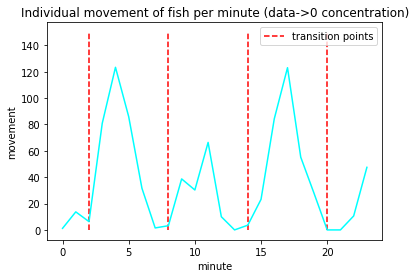

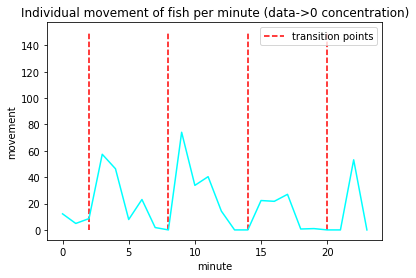

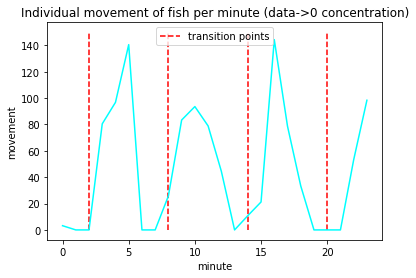

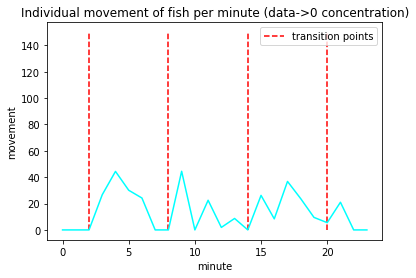

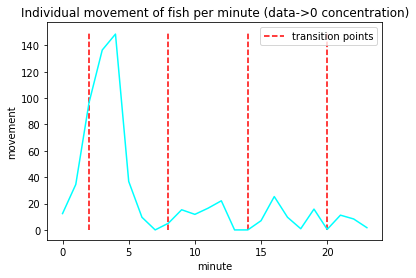

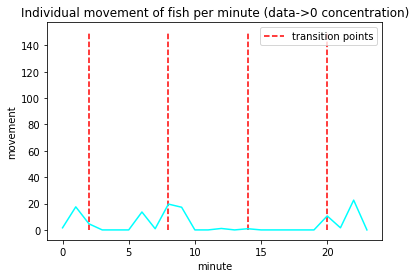

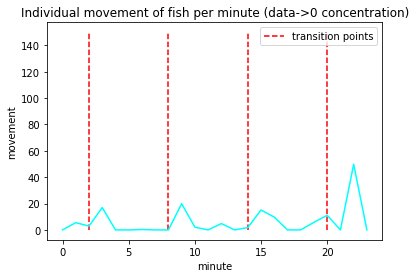

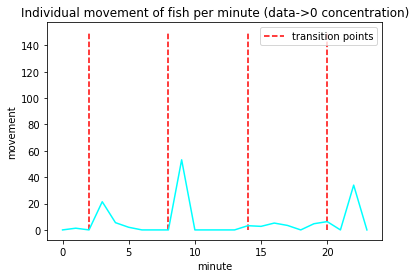

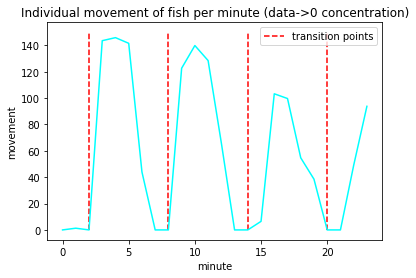

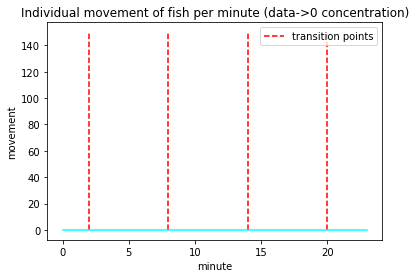

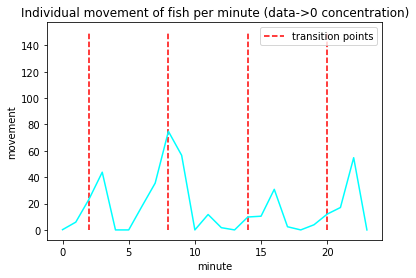

'not_mostly_lt_5'

In [10]:
## see near 0 fish across all (383) chemicals

df_lpr_min_t_only = pd.DataFrame(df_0_conc.iloc[:,4:28])
#display(df_lpr_min_t_only.head())

df_lpr_min_t_only_each_value = pd.DataFrame()


array_lpr_min_t_only = df_lpr_min_t_only.to_numpy()


# print(stats.describe(array_lpr_min_t_only))


# print(array_lpr_min_t_only.shape)
# print(array_lpr_min_t_only[:1])

array_t = []
for i in range(24):
    array_t.append(i)
#print(array_t)

# just to draw plot per row
count = 0
for i in range(len(array_lpr_min_t_only)):
    array_lpr_min_t_only_per_row = array_lpr_min_t_only[i]
    plt.plot(array_t, array_lpr_min_t_only_per_row, color='cyan', linestyle='-')
    
    plt.xlabel("minute")
    plt.ylabel("movement")
    plt.title("Individual movement of fish per minute (data->0 concentration)")

    plt.vlines(x = [2, 8, 14, 20], ymin = 0,  ymax=150,
           colors = 'red', 
           label = 'transition points', linestyles='--')
    plt.legend()

    plt.show()
    count += 1
    if count > 10:
        break


In [11]:
a=b

# below was investigational

NameError: name 'b' is not defined

In [ ]:
## iterate over all items
start_time = time.time()

df_lpr_min_t_only = pd.DataFrame(df_lpr_min.iloc[:,4:28]).astype(float)

df_content = pd.DataFrame()
for label, content in df_lpr_min_t_only.items():
    #print(f'label: {label}')
    #print(f'content: {content}', sep='\n')
    d = {'content': content}
    df_temp = pd.DataFrame(list(d.values()), index=d.keys())
    df_content = pd.concat([df_content, df_temp], axis = 1)
    #display(df_content.tail())
    display(df_content.tail())

df_content.describe()

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("'iterate over all items' took "+str(time_took))

In [ ]:
## see near 0 fish across per chunks of chemicals respectively
## per chemical

#full_devel = "full"
full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_lpr_min['chemical.id'])
else:
    chemical_id_from_here = [53, 1030]
    #chemical_id_from_here = [53]

per_this_number_of_chemicals = 2 # parameter

chemical_merged = 0 # initial value
df_lpr_min_t_only_per_chunk = pd.DataFrame()

for chemical_id in chemical_id_from_here:
    print("\nchemical_id:\n" + str(chemical_id))
        
    df_lpr_min_per_chemical_id = df_lpr_min.loc[df_lpr_min['chemical.id'] == chemical_id]
    
#    print("\ndf_lpr_min_per_chemical_id:\n" + str(df_lpr_min_per_chemical_id))
    
    df_lpr_min_per_chemical_id_t_only = pd.DataFrame(df_lpr_min_per_chemical_id.iloc[:,4:28]).astype(float)
    #print("\n(before concat) df_lpr_min_t_only_per_chunk:\n" + str(df_lpr_min_t_only_per_chunk))
    #print(f"\nlen(df_lpr_min_per_chemical_id_t_only):{(len(df_lpr_min_per_chemical_id_t_only))}\n")
    
    df_lpr_min_t_only_per_chunk = pd.concat([df_lpr_min_t_only_per_chunk, df_lpr_min_per_chemical_id_t_only], axis = 1)
    # axis = 0 --> per index, axis = 1 --> per column
    #print("\n(after concat) df_lpr_min_t_only_per_chunk:\n" + str(df_lpr_min_t_only_per_chunk))
    
    # Nan occurs because of different length per df_per_chemical?
    
    chemical_merged += 1
    if (chemical_merged >= per_this_number_of_chemicals):
        chemical_merged = 0
        array_lpr_min_t_only_per_chunks = df_lpr_min_t_only_per_chunk.to_numpy()
        count_near_0(array_lpr_min_t_only_per_chunks)
        print (f"before re-init array_lpr_min_t_only_per_chunks:{array_lpr_min_t_only_per_chunks}")
        df_lpr_min_t_only_per_chunk = pd.DataFrame() # re-initialization
        array_lpr_min_t_only_per_chunks = df_lpr_min_t_only_per_chunk.to_numpy()
        print (f"after re-init array_lpr_min_t_only_per_chunks:{array_lpr_min_t_only_per_chunks}")
        

In [ ]:
## see near 0 fish across per chunks of chemicals respectively
## per chemical and plate

#full_devel = "full"
full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_lpr_min['chemical.id'])
else:
    #chemical_id_from_here = [53, 1030]
    chemical_id_from_here = [53]

per_this_number_of_chemicals = 1 # parameter

chemical_merged = 0 # initial value

for chemical_id in chemical_id_from_here:
    #print("\nchemical_id:\n" + str(chemical_id))
    
    df_lpr_min_t_only_per_chunks = pd.DataFrame()
    
    df_lpr_min_per_chemical_id = df_lpr_min.loc[df_lpr_min['chemical.id'] == chemical_id]
    
    plate_id_from_here = np.unique(df_lpr_min_per_chemical_id['plate.id'])
    plate_count = 0
    array_lpr_min_t_only_per_chunks = pd.DataFrame()
    for plate_id in plate_id_from_here:
        df_lpr_min_per_chemical_id_per_plate_id = df_lpr_min_per_chemical_id.loc[df_lpr_min_per_chemical_id['plate.id'] == plate_id]
        df_lpr_min_per_chemical_id_per_plate_id_t_only = pd.DataFrame(df_lpr_min_per_chemical_id_per_plate_id.iloc[:,4:28])
        
        df_lpr_min_t_only_per_chunks = pd.concat([df_lpr_min_t_only_per_chunks, 
                                                  df_lpr_min_per_chemical_id_per_plate_id_t_only], 
                                                  axis = 1)
        plate_count += 1
        if plate_count >= 2:
            break
    
    
    chemical_merged += 1
    if (chemical_merged >= per_this_number_of_chemicals):
        chemical_merged = 0
        array_lpr_min_t_only_per_chunks = df_lpr_min_t_only_per_chunks.to_numpy()
        count_near_0(array_lpr_min_t_only_per_chunks)
        